# Conservitive Flow Calculations using an Evolution Matrix 

Say we have n bins, labeled m_i.  Each bin can holds a quanity of something which for ease of discussion we will call mass.  Each bin is in contact with 1 or more other bins.  Mass can flow into and out of bins via these contacts.  

The flow rates are defined by parameters f_ij.  Where m_i is the emitting bin and m_j is the absorbing bin.

We can define an array of 2 bins in numpy,

In [205]:
n_masses = 2
m = np.ones((n_masses))
print(m)

[ 1.  1.]


We can define the flow matrix as an n*n matrix

In [215]:
f = np.array([[0.3, 0.1], [0.2, 0.4]])
print(f)

[[ 0.3  0.1]
 [ 0.2  0.4]]


The rate of change of mass in all bins can be calculated by,

In [216]:
rate_of_change = sum((m*f).transpose())
print(rate_of_change)

[ 0.65216  1.08024]


And so the new mass of the bins is,

In [217]:
m = m + sum((m*f).transpose())
print(m)

[ 2.18056  3.01664]


In [218]:
n_masses = 2
m = np.ones((n_masses))
f = np.array([[0, 0.1], [0.2, 0]])
for i in range(4):
    print('Total mass in system: {}'.format(sum(m)))
    m = m + sum((m*f).transpose())

Total mass in system: 2.0
Total mass in system: 2.3
Total mass in system: 2.64
Total mass in system: 3.026


To conserve mass we need the outflow from a bin to equal the sum of inflows caused by that bin on all other bins.

We need to look at what the matrix elements mean.

Obviously a diagonal f matrix results in a diagonal rate of change matrix.

In [237]:
f = np.array([
    [0.1, 0], 
    [0, 0.2]])
m = np.ones((n_masses))
r = (m*f).transpose()
print('Rate of change matrix: \n{}'.format(r))
print('Rate of change: {}'.format(sum(r)))
print('New mass: {}'.format(m+sum(r)))

Rate of change matrix: 
[[ 0.1  0. ]
 [ 0.   0.2]]
Rate of change: [ 0.1  0.2]
New mass: [ 1.1  1.2]


The ith, ith element of the rate of change matrix matrix represents the outflowing change in mass of the ith bin.

Positive numbers mean the outflow is actually increasing the mass.  So lets be more sensible and make these diagonals negitive.

In [238]:
outflow_1 = 0.1
outflow_2 = 0.2
f = np.array([
    [-outflow_1, 0], 
    [0, -outflow_2]])
m = np.ones((n_masses))
r = (m*f).transpose()
print('Rate of change matrix: \n{}'.format(r))
print('Rate of change: {}'.format(sum(r)))
print('New mass: {}'.format(m+sum(r)))

Rate of change matrix: 
[[-0.1  0. ]
 [ 0.  -0.2]]
Rate of change: [-0.1 -0.2]
New mass: [ 0.9  0.8]


If the diagonals of f are the outflows what do the off-diagonal elements mean?

The ith, jth element in f represents the flow into the jth element from the ith element.  Here I'll just have one non-zero element in the matrix and I'll vary the masses so where the extra mass is coming from is clear.

In [245]:
outflow_from_1_to_2 = 0.1
f = np.array([
    [0, 0], 
    [outflow_from_1_to_2, 0]])
m = np.array([1, 2])
r = (m*f).transpose()
print('Rate of change matrix: \n{}'.format(r))
print('Rate of change: {}'.format(sum(r)))
print('New mass: {}'.format(m+sum(r)))
print('Total mass: {}'.format(sum(m+sum(r))))

Rate of change matrix: 
[[ 0.   0.1]
 [ 0.   0. ]]
Rate of change: [ 0.   0.1]
New mass: [ 1.   2.1]
Total mass: 3.1


So the second bin has gained 0.1 from from an inflow from the first bin.

## Conservation

Clearly mass is not being conservered in our calculation.  To make this flow conservitive we just need this inflow into bin 2 to be balanced by an outflow from bin 1.  We already know that diagonals govern outflows.

In [249]:
outflow_from_1_to_2 = 0.1
f = np.array([
    [-outflow_from_1_to_2, 0], 
    [outflow_from_1_to_2, 0]])
m = np.array([1, 2])
r = (m*f).transpose()
print('Starting Total mass: {}'.format(sum(m)))
print('Rate of change matrix: \n{}'.format(r))
print('Rate of change: {}'.format(sum(r)))
print('New mass: {}'.format(m+sum(r)))
print('Final Total mass: {}'.format(sum(m+sum(r))))

Starting Total mass: 3
Rate of change matrix: 
[[-0.1  0.1]
 [ 0.   0. ]]
Rate of change: [-0.1  0.1]
New mass: [ 0.9  2.1]
Final Total mass: 3.0


In general to have mass be conserved, the sum of the off diagonal elements in a column of the f matrix to equal the negative value of the diagonal element in that matrix.

    for each j:
        -f[i, i] = sum(f[i, j]) where i!=j
        
Adding inflows and outflows to the second bin for instance we might get the following.

In [250]:
outflow_from_1_to_2 = 0.1
outflow_from_2_to_1 = 0.2
f = np.array([
    [-outflow_from_1_to_2, outflow_from_2_to_1], 
    [outflow_from_1_to_2, -outflow_from_2_to_1]])
m = np.array([1, 2])
r = (m*f).transpose()
print('Starting Total mass: {}'.format(sum(m)))
print('Rate of change matrix: \n{}'.format(r))
print('Rate of change: {}'.format(sum(r)))
print('New mass: {}'.format(m+sum(r)))
print('Final Total mass: {}'.format(sum(m+sum(r))))

Starting Total mass: 3
Rate of change matrix: 
[[-0.1  0.1]
 [ 0.4 -0.4]]
Rate of change: [ 0.3 -0.3]
New mass: [ 1.3  1.7]
Final Total mass: 3.0


Given a matrix with arbitrary off diagonal elements we can build a conservitive flow matrix by adjusting the diagonal elements to be the negitive sum of the other cells in the column.

In [257]:
def normalize(f):
    f = f.copy()
    for i in range(len(f)):
        f[i][i] = 0
        f[i][i] = -sum(f[:, i])
    return f

origional_f = np.random.rand(3, 3)
normalized_f = normalize(origional_f)
print('Origional Flow Matrix: \n{}'.format(origional_f))
print('Normalized Flow Matrix: \n{}'.format(normalized_f))

Origional Flow Matrix: 
[[ 0.83132943  0.63576838  0.54658462]
 [ 0.05438179  0.65087983  0.15404665]
 [ 0.49144831  0.26546387  0.22290416]]
Normalized Flow Matrix: 
[[-0.5458301   0.63576838  0.54658462]
 [ 0.05438179 -0.90123225  0.15404665]
 [ 0.49144831  0.26546387 -0.70063127]]


## Evolution

Running the system is as easy as repeatedly applying.

    m = m + sum((m*f).transpose())
    
A time scale parameter can be added to this.  This parameter can be used to improve the stability and to speed up calculation.

    m = m + (sum((m*f).transpose()) * time_scale)
    
Where time_scale is a float.

We can build a general function to perform evolution.

In [260]:
def evolve(m, f, t_scale):
    return m + (sum((m*f).transpose()) * t_scale)

A generator is a natural method to iterate our evolution.

In [271]:
from itertools import count

def run(m, f, t_scale):
    while True:
        m = evolve(m, f, t_scale)
        yield m

Then a for loop can be used to run the system.

In [272]:
n_masses = 5
max_t = 5

m = np.ones(n_masses)
f = normalize(np.random.rand(n_masses, n_masses))

for t, new_m in enumerate(run(m, f, t_scale=0.1)):
    print('{} {}'.format(t, new_m))
    if t>max_t:
        break

0 [ 1.05763849  1.10146431  1.027612    0.92583704  0.88744817]
1 [ 1.10611035  1.16936189  1.04281847  0.86343097  0.81827832]
2 [ 1.14671045  1.21511242  1.04980778  0.81260104  0.77576832]
3 [ 1.18055389  1.24616956  1.0515507   0.77214122  0.74958463]
4 [ 1.20862084  1.26741842  1.05011153  0.74048068  0.73336853]
5 [ 1.23177779  1.28207574  1.0468926   0.7160291   0.72322478]
6 [ 1.25078859  1.29227095  1.04282136  0.69734078  0.71677833]


## Restricting The Flow Matrix To Nearest Neighbors

A common thing in physical systems is that interactions between bins is limited to only those bins that are next to each other.

We can adjust our flow matrix to achive this my zeroing matrix elements for non-nearest neighbors.  We can generalize this to the nth nearest neighbor simply by checking the distance from i to j.

In [282]:
def restrict(f, n):
    f = f.copy()
    for x, i in enumerate(f):
        for y, j in enumerate(i):
            if abs(x-y) > n:
                f[x, y] = 0   
    return f

origional_f = np.random.rand(5, 5)
restricted_f = restrict(origional_f, 1)
restricted_f_2nd = restrict(origional_f, 2)
print('Origional Flow Matrix: \n{}'.format(origional_f))
print('Nearest Neighbor Flow Matrix: \n{}'.format(restricted_f))
print('Second Nearest Neighbor Flow Matrix: \n{}'.format(restricted_f_2nd))

Origional Flow Matrix: 
[[ 0.94901119  0.07373072  0.40280888  0.10962189  0.21736238]
 [ 0.57243254  0.15783707  0.27601593  0.05495225  0.290199  ]
 [ 0.4433195   0.78412435  0.8033418   0.02677719  0.80520274]
 [ 0.69067859  0.62851175  0.49412526  0.38743102  0.65122427]
 [ 0.22455437  0.30060308  0.14726278  0.52992953  0.48753825]]
Nearest Neighbor Flow Matrix: 
[[ 0.94901119  0.07373072  0.          0.          0.        ]
 [ 0.57243254  0.15783707  0.27601593  0.          0.        ]
 [ 0.          0.78412435  0.8033418   0.02677719  0.        ]
 [ 0.          0.          0.49412526  0.38743102  0.65122427]
 [ 0.          0.          0.          0.52992953  0.48753825]]
Second Nearest Neighbor Flow Matrix: 
[[ 0.94901119  0.07373072  0.40280888  0.          0.        ]
 [ 0.57243254  0.15783707  0.27601593  0.05495225  0.        ]
 [ 0.4433195   0.78412435  0.8033418   0.02677719  0.80520274]
 [ 0.          0.62851175  0.49412526  0.38743102  0.65122427]
 [ 0.          0.      

Its worth noting that these flow matrixes do not wrap-around.  The first bin does not flow into last bin and vice versa.

## Investigating The System

Putting all the tools we've built togeter we get the following small module.

In [360]:
from itertools import count

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def evolve(m, f, t_scale):
    return m + (sum((m*f).transpose()) * t_scale)

def normalize(t):
    t = t.copy()
    for i in range(len(t)):
        t[i][i] = 0
        t[i][i] = -sum(t[:, i])
    return t

def random_f(n):
    return normalize(np.random.rand(n, n)/(n-1))

def restrict(f, n):
    f = f.copy()
    for x, i in enumerate(f):
        for y, j in enumerate(i):
            if abs(x-y) > n:
                f[x, y] = 0   
    return normalize(f)

def run(m, f, t_scale, max_t=None):
    for t in count():
        m = evolve(m, f, t_scale)
        yield m
        if max_t is not None:
            if t >= max_t:
                break
                
def plot(f, history):
    f = f.copy()
    fig, axes = plt.subplots(1, 3, figsize=(20,10))
    np.fill_diagonal(f, 0)
    for ax, im in zip(axes[:-1], [f.real, history]):
        ax.imshow(im)

    for j in range(len(history[0])):
        axes[-1].plot([i[j] for i in history])

There are two new functions here. 

  1. random_f - This is a helper to generate a random normalize and properly scalled flow matrix.  The matrix is scalled by the number of masses so the system doesn't get unstable as we add more bins.
  2. plot - given a flow matrix and a list of mass arrays (representing the mass of the system at proceeding times, this function produces a standard plot of the behaviour of the system.  LHS - a visualisation of the flow matrix.  The diagonals are zeroed for clarity. Center - The mass of the bins over time.  t=0 is at the top.  RHS - a plot of the mass of the bins.

## Simple Random Flow Matrix

Putting it all together we can run a system and get some results.

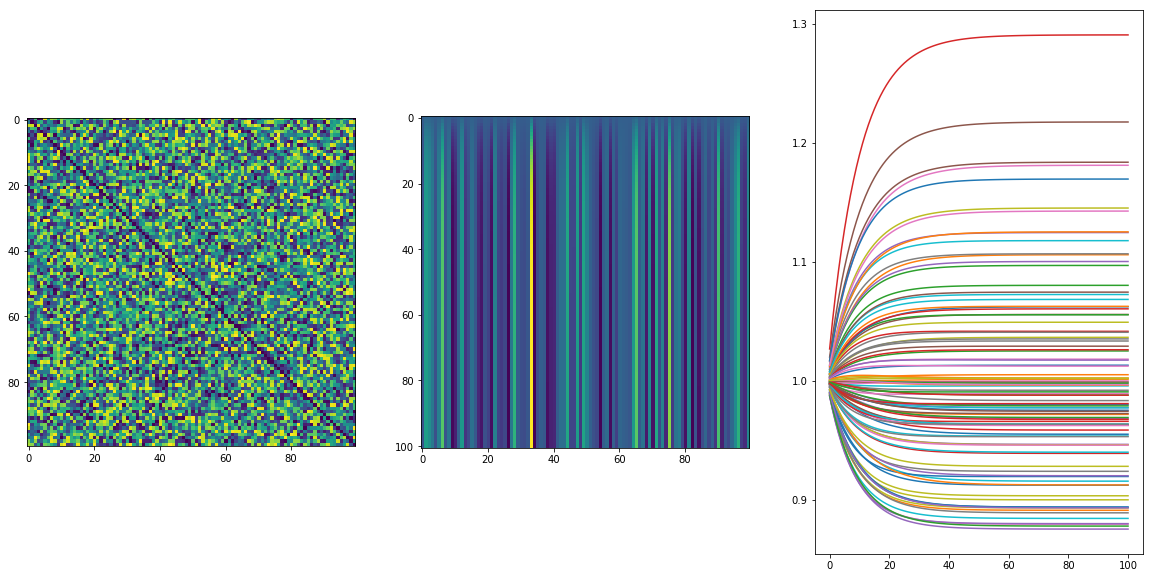

In [337]:
t_scale = 0.2
n_masses = 100
max_t = 100

m = np.ones((n_masses))
f = random_f(n_masses)

history = []
for m in run(m, f, t_scale=t_scale, max_t=max_t):
    history.append(m)
    
plot(f, history)

This random system gets to a steady state at about t=60.  Its not terribly interesting but it is fast.

## Simple Random Flow Matrix With Nearest Neighbors

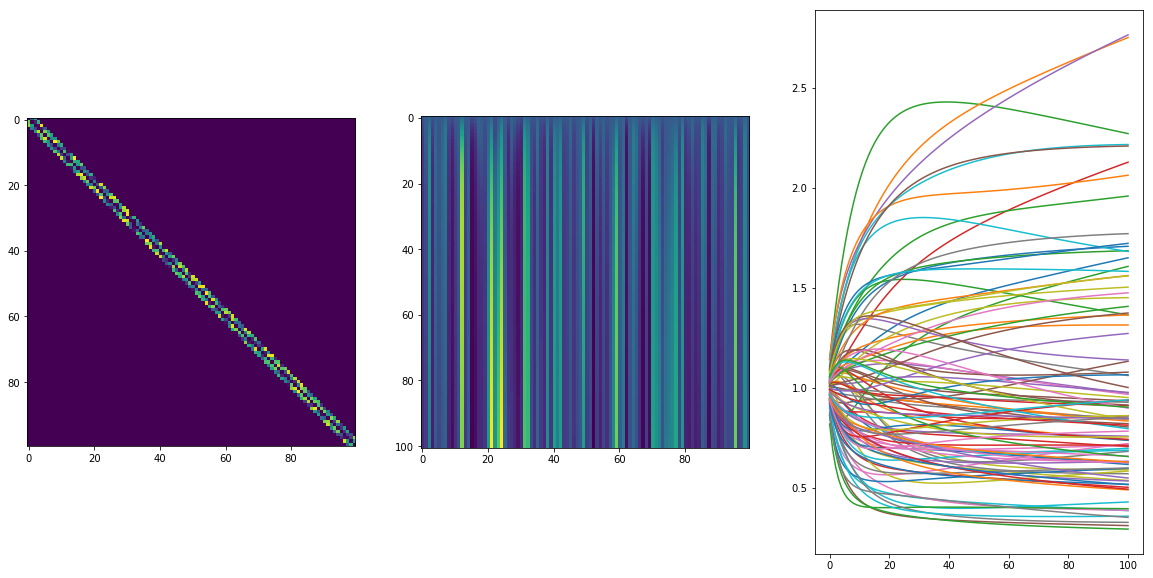

In [338]:
t_scale = 8.0
n_masses = 100
max_t = 100

m = np.ones((n_masses))
f = restrict(random_f(n_masses), n=2)

history = []
for m in run(m, f, t_scale=t_scale, max_t=max_t):
    history.append(m)
    
plot(f, history)

A restricted flow matrix slows down the flow of material into distant bins.  This system takes about 10x longer to reach an equililibrium.

## Time Variationin the Flow

The elegance of the matrix approach gives us the ability to model a flow that varies with time by making the flow matrix imaginary.

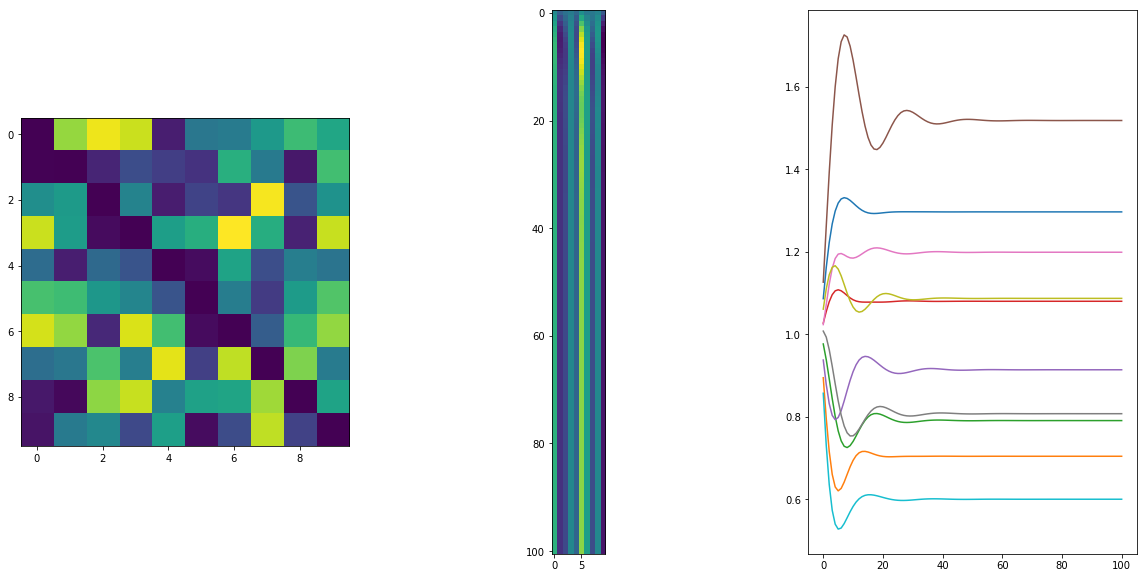

In [372]:
n_masses = 10
t_scale = 0.5
t_max = 100

m = np.ones((n_masses))
f = random_f(n_masses) + random_f(n_masses) * 1j

history = []
for m in run(m, f, t_scale=t_scale, max_t=max_t):
    history.append(m.real)
    
plot(f, history)

A restricted imaginary flow matrix again takes longer to settle.

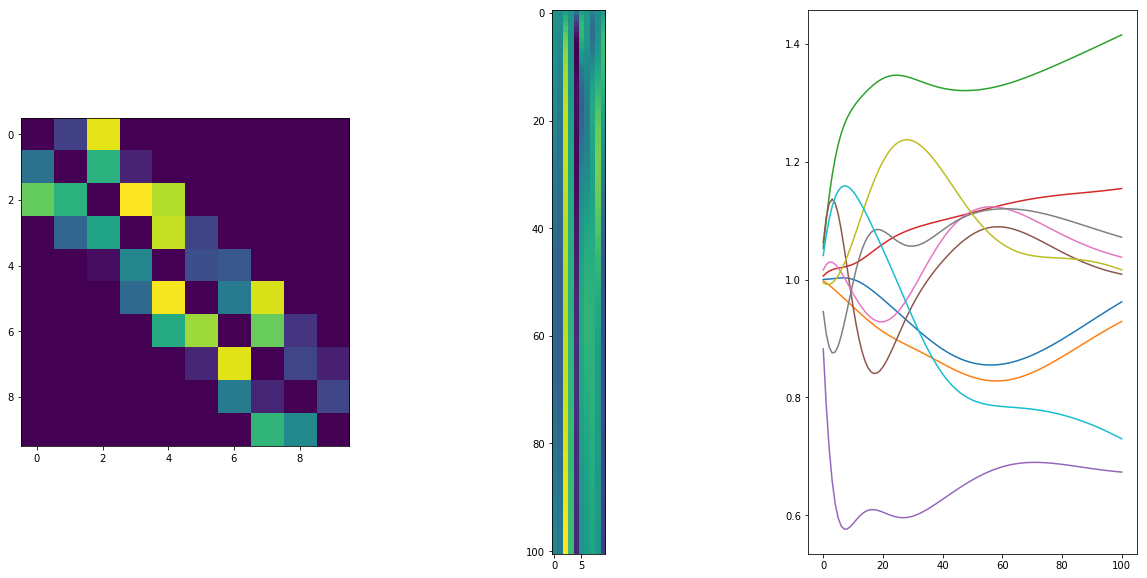

In [375]:
n_masses = 10
t_scale = 0.5
t_max = 100

m = np.ones((n_masses))
f = restrict(random_f(n_masses) + random_f(n_masses) * 1j, n=2)

history = []
for m in run(m, f, t_scale=t_scale, max_t=max_t):
    history.append(m.real)
    
plot(f, history)

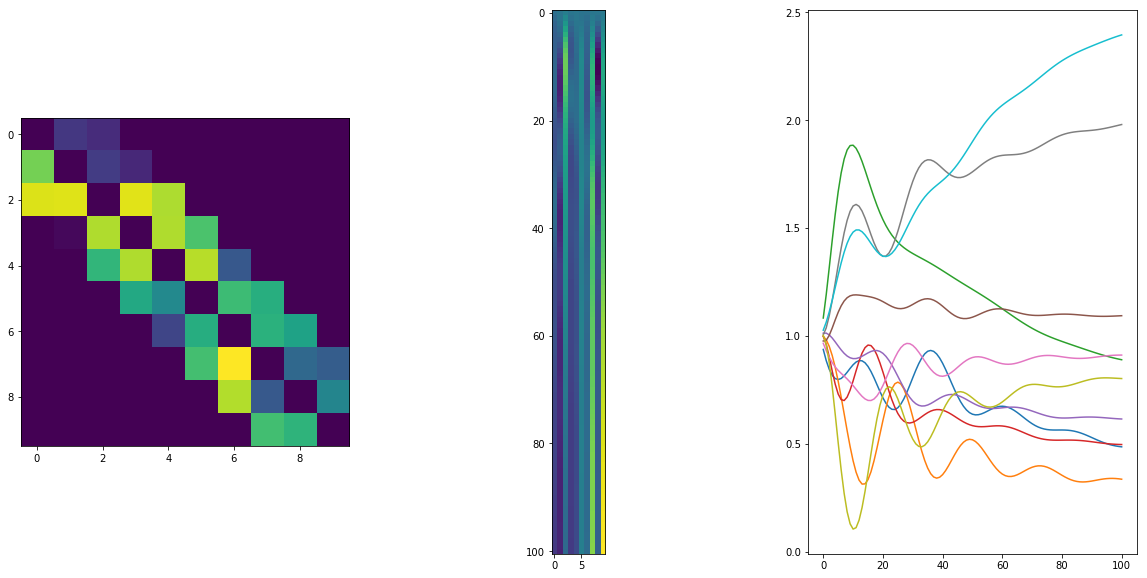

In [385]:
n_masses = 10
t_scale = 0.5
t_max = 100

m = np.ones((n_masses))
f = restrict((random_f(n_masses)*1) + (random_f(n_masses) * 2j), n=2)

history = []
for m in run(m, f, t_scale=t_scale, max_t=max_t):
    history.append(m.real)
    
plot(f, history)